# Cenário: Demonstração de Navegação com Aeronave de Caça

### Descrição Geral:
Este cenário descreve um voo de navegação realizado por uma aeronave de caça, enfocando a execução de manobras em diferentes altitudes e velocidades. A navegação abrange uma variação de altitude entre Flight Level (FL) 100 e FL 350, bem como uma variação de velocidade entre 350 knots e 550 knots. Durante este voo, no terceiro ponto da rota, a aeronave realizará uma manobra de espera em torno de um ponto específico (**Hold**) durante 10 minutos, integrando-a ao padrão de voo.

<img src='./nav_demo.gif' width='500' height='500'>

**Esta célula importa todos os módulos necessários para execução e análise das simulações.**

In [1]:
# Bibliotecas para análise de dados e plotagem
import pandas as pd           # Biblioteca para análise e manipulação de dados, apelidada de 'pd'.
import matplotlib.pyplot as plt # Biblioteca para criar visualizações de dados estáticas, animadas e interativas, apelidada de 'plt'.
import seaborn as sns         # Biblioteca baseada em matplotlib para desenhar gráficos estatísticos atraentes e informativos.

# Biblioteca específica
import asapy                  # Fornece vinculações Python para a API AsaPy.

# Configurações de exibição
import warnings               # Biblioteca para manipular avisos.
warnings.filterwarnings('ignore') # Suprime avisos para tornar a saída mais limpa.

2023-12-18 17:27:37.112876: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 17:27:37.168323: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-18 17:27:37.169460: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 17:27:38.158407: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using TensorFlow backend


## EXPERIMENTO 1: Análise da Relação entre Tempo de Voo e Consumo de Combustível

### Objetivo do Experimento:
Este experimento visa investigar a relação entre o tempo de voo (`time_of_flight_blue`) e o consumo de combustível (`fuel_consumed_blue`) em um cenário de simulação de voo. O objetivo principal é entender se existe uma correlação direta entre essas duas variáveis, ou seja, se um aumento no tempo de voo resulta consistentemente em um maior consumo de combustível.

### Metodologia:
- Dados Utilizados: Serão analisados dados de **4000** simulações de voo, onde `time_of_flight_blue` representa a duração total do voo (em segundos) e `fuel_consumed_blue` indica a quantidade de combustível consumida (em libras).
- Análise Estatística: Aplicar métodos estatísticos para avaliar a relação entre as duas variáveis. Isso inclue a realização de uma análise de regressão linear, cálculo do coeficiente de correlação, ou outros métodos estatísticos relevantes.
- Visualização de Dados: Utilizar gráficos (como gráficos de dispersão) para visualizar a relação entre tempo de voo e consumo de combustível, facilitando a interpretação dos resultados.

### Hipóteses:
A hipótese principal é que existe uma correlação positiva entre o tempo de voo e o consumo de combustível, significando que quanto maior o tempo de voo, maior o consumo de combustível.

### Resultados Esperados:
Os resultados podem ser úteis para o planejamento de rotas aéreas mais eficientes em termos de consumo de combustível, e para aprimorar modelos de previsão de consumo de combustível em simulações aeronáuticas.

### Aplicações Potenciais:
Os resultados podem ser úteis para treinamento em simuladores de voo, planejamento de rotas aéreas mais eficientes em termos de combustível, e para aprimorar modelos de previsão de consumo de combustível em simulações aeronáuticas.

#### Carregando Dados das Simulações

Nesta célula, estamos carregando dados de diferentes simulações a partir de arquivos CSV. Para cada cenário, existem dois tipos de arquivos:

1. Arquivos `*_aliases.csv`: Estes contêm as entradas (ou parâmetros) para cada simulação.

2. Arquivos `*_output.csv`: Estes contêm os resultados das simulações. 

Os dados são lidos e carregados em DataFrames do pandas para análise e processamento subsequentes.


In [2]:
x = pd.read_csv('./nav_demo_aliases.csv')
y = pd.read_csv('./nav_demo_output.csv')

Visualização dos Aliases

In [3]:
x.head(5)

,speed,altitude
0,485.10,13339.30
1,518.46,34516.34
2,501.61,23487.75
3,525.65,16748.43
4,438.32,21489.87


Visualização dos resultados brutos das simulações

In [4]:
y.head(5)

,id,frame,execution_id,mixr_type,asa_type,asa_custom_type,payload,sim_time,utc_time,execution_uuid,batch_id,experiment
0,135083492,0,135830,1,0,NaN,{},1970-01-01T09:00:00-03:00,1970-01-01T15:52:55-03:00,2269241d-cffe-47ef-98c0-fb801bcdf007,2609,10
1,135083493,0,135830,3,0,NaN,{},1970-01-01T09:00:00-03:00,1970-01-01T15:52:55-03:00,2269241d-cffe-47ef-98c0-fb801bcdf007,2609,10
2,135083494,7,135830,1000,1000,asa::models::AsaTeamMetricsState,{'side': 'blue'},1970-01-01T09:00:05.12-03:00,1970-01-01T15:53:01.004028-03:00,2269241d-cffe-47ef-98c0-fb801bcdf007,2609,10
3,135083495,38315,135830,1000,1000,asa::models::AsaTeamMetricsState,{'side': 'blue'},1970-01-01T09:31:13.72-03:00,1970-01-01T16:24:09.604028-03:00,2269241d-cffe-47ef-98c0-fb801bcdf007,2609,10
4,135083496,38376,135830,1000,1000,asa::recorder::AsaMonitorReport,"{'metrics': {'last_state': {}, 'fuel_consumed'...",1970-01-01T09:32:13.62-03:00,1970-01-01T16:25:09.504028-03:00,2269241d-cffe-47ef-98c0-fb801bcdf007,2609,10


### Criar objeto Preprocessing e Pré-processar Dados

O seguinte trecho de código é parte fundamental do processo de preparação dos dados brutos provenientes das simulações. Utilizando a biblioteca AsaPy, o código aborda três áreas principais: aliases, mensagens do tipo monitor report e mensagens do tipo weapon detonation. 

1. **Criação do objeto Preprocessing:** Utilizando a classe `Preprocessing` da biblioteca AsaPy, é criado um objeto `preprocessing`. Essa instância facilita a aplicação de métodos de pré-processamento específicos nos dados brutos das simulações.

2. **Pré-processamento de Aliases:** A função `preprocessing.aliases()` é utilizada para processar os aliases, convertendo-os de um formato bruto para uma representação mais acessível e interpretável.

3. **Pré-processamento de Team Metrics:** Através da funções `preprocessing.team_metrics()`, os dados brutos das mensagens do tipo `Team Metrics` são transformados em um formato que facilita a análise.

Este conjunto de operações desempenha um papel vital na análise de dados das simulações, pois transforma informações brutas e complexas em uma forma que é mais facilmente manipulada e entendida, estabelecendo assim uma base sólida para investigações posteriores.

Criação do objeto preprocessing e preprocessamento dos aliases e dos outputs das simulações

In [5]:
# Criação do objeto preprocessing
preprocessing  = asapy.Preprocessing()

# Função para pré-processar o DataFrame de aliases
x = preprocessing.aliases(x)

# Função para pré-processar o DataFrame de resultados do tipo Team Metrics
y = preprocessing.team_metrics(y)

Visualização dos aliases tratados

In [6]:
x.head(5)

,speed,altitude
experiment,,
0,485.10,13339.30
1,518.46,34516.34
2,501.61,23487.75
3,525.65,16748.43
4,438.32,21489.87


Visualização dos resultados tratados das simulações

In [7]:
y.head(5)

,fuel_consumed,time_of_flight
experiment,,
0,1460.593196,1998.7
1,883.070714,1875.9
2,1063.105283,1935.3
3,1400.689116,1855.2
4,1051.047824,2143.5


### Análise de Relação Entre Variáveis

A validação dos modelos utilizados em simulações é uma tarefa crucial para garantir que os resultados sejam confiáveis e representativos da realidade. Uma das formas de fazer isso é analisar a relação entre variáveis críticas, como o combustível consumido e o tempo de voo. A seguir, apresentamos um guia abrangente para explorar e validar essa relação em seu DataFrame df1.

#### 1. Análise Descritiva

Antes de mais nada, é fundamental analisar as estatísticas básicas dessas variáveis. Isso proporciona uma visão clara da distribuição, centralidade, e dispersão dos dados, características fundamentais para uma avaliação inicial da validade do modelo.

#### 2. Gráfico de Dispersão

Este gráfico é uma ferramenta visual poderosa que mostra como duas variáveis interagem. No contexto de combustível consumido e tempo de voo, por exemplo, uma relação linear clara pode indicar que quanto mais tempo um avião permanece no ar, mais combustível ele consome.

#### 3. Correlação

A correlação quantifica o grau em que duas variáveis mudam juntas:

- **Correlação de Pearson**: Mede a relação linear entre duas variáveis contínuas. Use quando as variáveis têm uma distribuição normal e a relação parece ser linear. Valores próximos a 1 ou -1 indicam uma relação linear forte.

- **Correlação de Spearman**: Utilizada quando a relação entre as variáveis não é linear, ou quando as variáveis são ordinais. A correlação de Spearman avalia como bem a relação entre as variáveis pode ser descrita usando uma função monotônica.

- **Correlação de Kendall**: Avalia a força da dependência monotônica entre duas variáveis. É particularmente útil com conjuntos de dados pequenos, com muitos empates, ou para dados ordinais. É menos sensível a outliers do que a correlação de Pearson.

#### 4. Regressão Linear

Através da regressão linear, pode-se não apenas verificar a relação entre as variáveis, mas também prever uma com base na outra. O coeficiente de determinação (R²) é uma métrica essencial aqui, pois indica a porcentagem da variância na variável dependente que é previsível a partir da variável independente.

#### 5. Plot de Resíduos

O plot de resíduos é uma representação gráfica dos erros entre valores observados e previstos. Algumas características típicas e suas interpretações são:

- **Padrão Aleatório**: Se os resíduos estiverem distribuídos aleatoriamente ao redor do eixo horizontal, isso indica um bom ajuste do modelo.
- **Curvas ou Padrões**: Padrões discerníveis, como curvas, podem sugerir que uma variável importante não foi incluída no modelo ou que a relação não é linear.
- **Forma de Funil (heterocedasticidade)**: Se os resíduos se alargarem ou estreitarem conforme os valores ajustados aumentam, isso sugere que os resíduos têm variações não constantes.
- **Resíduos Fora do Padrão (Outliers)**: Pontos isolados longe do padrão aleatório podem indicar outliers.
- **Tendência Linear**: Uma linha clara nos resíduos pode indicar uma variável preditora omitida.
- **Agrupamentos**: Agrupamentos de resíduos podem indicar subgrupos no conjunto de dados que o modelo não está capturando.


Para responder a perguntar: 

"**Se eu voei mais tempo (`time_of_flight_blue`) significa que eu gastei mais combustível (`fuel_consumed_blue`)?**",

precisamos criar um objeto `analysis` Utilizando a classe `Analysis` da biblioteca AsaPy. Então utilizamos o método `analyze_relationship` para observar a relação entre as duas variáveis.

In [8]:
y

,fuel_consumed,time_of_flight
experiment,,
0,1460.593196,1998.7
1,883.070714,1875.9
2,1063.105283,1935.3
3,1400.689116,1855.2
4,1051.047824,2143.5
...,...,...
3995,874.407822,2057.3
3996,1255.497919,2159.2
3997,910.326782,2120.8


Descriptive Statistics
       fuel_consumed  time_of_flight
count    4000.000000     4000.000000
mean     1112.269791     2125.655700
std       197.737261      214.202077
min       849.476675     1796.400000
25%       976.460423     1941.650000
50%      1051.038187     2100.500000
75%      1201.854173     2300.000000
max      1867.779692     2551.700000



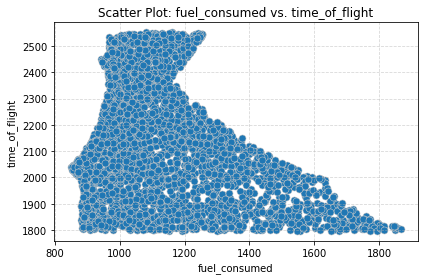

Pearson correlation between fuel_consumed and time_of_flight: -0.29
Spearman correlation between fuel_consumed and time_of_flight: -0.16
Kendall correlation between fuel_consumed and time_of_flight: -0.10



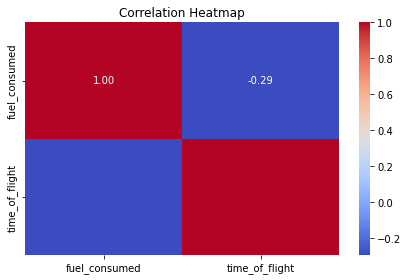

Mean Squared Error: 41911.49
R² Score: 0.09



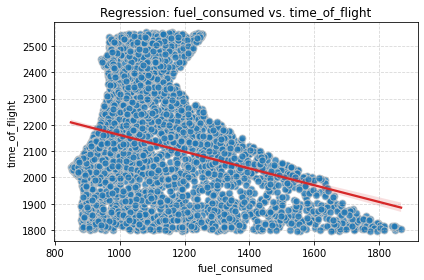

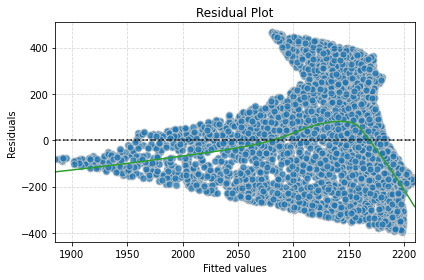

In [9]:
# Criação do objeto analysis
analysis = asapy.Analysis()

# Função para analisar o relacionamento entre duas variáveis em um DataFrame
analysis.analyze_relationship(y, 'fuel_consumed', 'time_of_flight')

#### Conclusão:

Com base na análise realizada, concluímos que **NÃO** existe uma relação linear direta entre as variáveis em estudo. 

A principal suspeita para a ausência de uma relação linear entre as variáveis estudadas é a variação nas velocidades e altitudes observadas durante as simulações de voo. Essas flutuações parecem ser fatores chave que impactam a dinâmica entre as variáveis, introduzindo uma complexidade que vai além de uma simples correlação linear. Variações na altitude podem afetar a eficiência do motor e as condições aerodinâmicas, enquanto alterações na velocidade podem mudar a resistência do ar e o consumo de combustível. Portanto, esta observação reforça a necessidade de investigar mais profundamente como estas variações na velocidade e altitude influenciam as variáveis de interesse, para entender melhor a natureza não-linear de suas interações. 

Essa análise será feita no **EXPERIMENTO 2**.

## EXPERIMENTO 2: Análise da Relação entre Velocidade, Altitude e Consumo de Combustível

### Objetivo do Experimento:
O Experimento 2 se propõe a explorar a complexa relação entre a velocidade de voo (`speed`), a altitude (`altitude`) e o consumo de combustível (`fuel_consumed`) em um ambiente de simulação de voo. O objetivo é compreender como a velocidade e a altitude, individualmente ou em combinação, influenciam o consumo de combustível de uma aeronave.

### Metodologia:
- **Dados Utilizados**: Serão analisados dados de simulação de voo, com `speed` indicando a velocidade da aeronave (em nós), `altitude` representando a altitude de voo (em pés) e `fuel_consumed` medindo a quantidade de combustível consumida (em libras).
- **Análise Estatística**: Utilização de análises estatísticas para examinar como as variáveis de velocidade e altitude se correlacionam com o consumo de combustível. A análise pode incluir a avaliação de interações entre a velocidade e a altitude.
- **Visualização de Dados**: Implementação de gráficos bidimensionais e gráficos de superfície para visualizar as relações complexas entre as três variáveis, facilitando a interpretação e o entendimento dos padrões observados.

### Hipóteses:
- **Hipótese Principal**: A hipótese é que tanto a velocidade quanto a altitude têm impactos significativos no consumo de combustível, com possíveis interações complexas entre estas duas variáveis.
- **Hipóteses Secundárias**: Explorar se velocidades mais altas ou altitudes maiores levam a um aumento proporcional no consumo de combustível, e se existe um ponto ótimo de eficiência de combustível em relação a essas variáveis.

### Resultados Esperados:
Espera-se que o experimento mostre padrões, possivelmente não-lineares, na interação entre velocidade, altitude e consumo de combustível de uma aeronave. Especificamente, é esperado que ao manter a altitude e a velocidade constantes, um aumento no tempo de voo resultará inequivocamente em um maior consumo de combustível. Contudo, o experimento também busca investigar como diferentes combinações de altitude e velocidade podem influenciar este consumo. Dessa forma, não se pode afirmar com certeza que o aumento no tempo de voo sempre levará a um consumo de combustível maior para todas as combinações de altitude e velocidade. Este estudo visa fornecer insights cruciais para a otimização do desempenho da aeronave em variadas condições operacionais.

### Aplicações Potenciais:
Os resultados podem ser aplicados no treinamento de pilotos para operações de voo mais eficientes, no desenvolvimento de estratégias de voo economicamente viáveis e na melhoria de modelos preditivos para o consumo de combustível em diferentes cenários de voo. Além disso, podem contribuir para o aprimoramento do design de aeronaves e sistemas de controle de voo, visando uma maior eficiência energética.

Criação de um dataframe `df` com os dados dos alieses (`speed` e `altitude`) com os dados de `fuel_consumed`.

In [10]:
# Dataframe gerado pelo merge dos dataframes de dados de entrada e saída da simulação
df = pd.merge(x, y[['fuel_consumed']], left_index=True, right_index=True)

# Visualização do dataframe df
df.head(5)

,speed,altitude,fuel_consumed
experiment,,,
0,485.10,13339.30,1460.593196
1,518.46,34516.34,883.070714
2,501.61,23487.75,1063.105283
3,525.65,16748.43,1400.689116
4,438.32,21489.87,1051.047824


Visualização 2D do relaciomento entre as variáveis `speed`, `altitude` e `fuel_consumed`.

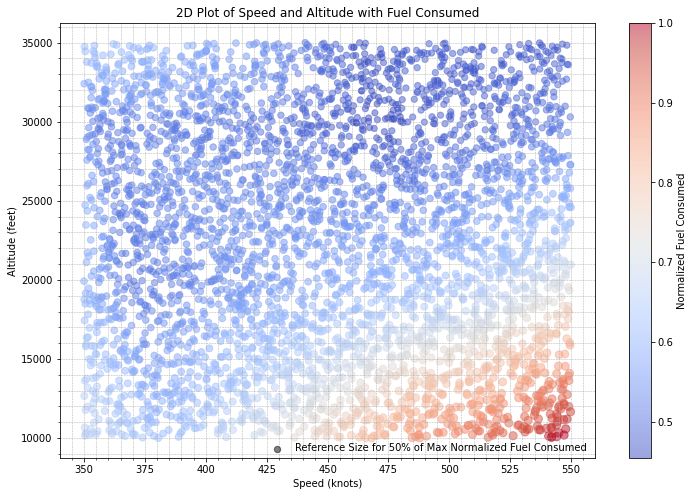

In [11]:
analysis.create_2d_scatter_plot(df=df, 
                       x_col='speed', 
                       y_col='altitude', 
                       size_col='fuel_consumed',
                       title='2D Plot of Speed and Altitude with Fuel Consumed', 
                       xlabel='Speed (knots)', 
                       ylabel='Altitude (feet)', 
                       size_label='Normalized Fuel Consumed',
                       cmap='coolwarm', 
                       figsize=(12, 8), 
                       alpha=0.5, 
                       grid=True, 
                       ref_size_value=0.5)

Visualização 3D do relaciomento entre as variáveis `speed`, `altitude` e `fuel_consumed`.

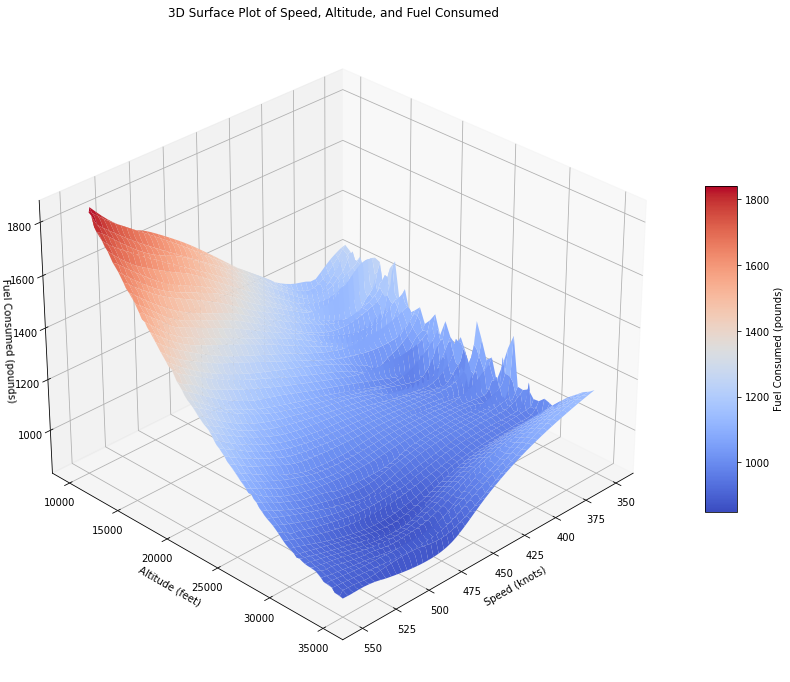

In [12]:
%matplotlib inline
analysis.create_3d_surface_plot(df=df, 
                       x_col='speed', 
                       y_col='altitude', 
                       z_col='fuel_consumed',
                       title='3D Surface Plot of Speed, Altitude, and Fuel Consumed', 
                       xlabel='Speed (knots)', 
                       ylabel='Altitude (feet)', 
                       zlabel='Fuel Consumed (pounds)')

#### Conclusões

- **Picos de Consumo de Combustível**: As regiões mais elevadas e **<span style="color:red">vermelhas</span>** indicam os maiores valores de consumo de combustível, que ocorrem a uma altitude de aproximadamente 10.000 pés e uma velocidade de aproximadamente 525 nós, onde o consumo atinge valores próximos a 1800 libras/hora.

- **Eficiência Operacional**: As áreas **<span style="color:blue">azuis</span>**, que representam menor consumo de combustível, sugerem faixas de operação mais eficientes. Os valores mais baixos de consumo, próximos a 1000 libras/hora, são observados em altitudes em torno de 25.000 a 30.000 pés e velocidades de 400 a 450 nós.

- **Consumo em Velocidades Intermediárias**: Observa-se uma variação complexa onde, em certas altitudes intermediárias, o consumo também é elevado, indicando um ponto de eficiência operacional que não segue uma relação linear simples com velocidade ou altitude.

- **Decisões de Rota**: As informações do gráfico podem ser utilizadas para planejar rotas que priorizem a eficiência de combustível, evitando faixas de altitude e velocidade que resultam em consumo excessivo.

- **Análise de Desempenho da Aeronave**: Os dados refletem o desempenho do motor e da aeronave sob diferentes condições operacionais, auxiliando engenheiros a ajustar ou projetar sistemas de propulsão mais eficientes.